In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN

sns.set(style='white', context='notebook', palette='deep')

In [2]:
###1.load data 
total_input = pd.read_csv("/mnt/data/lijincheng/UKB/Olink/0627/prediction/total_input.csv")

# 使用 pandas 读取 Excel 文件
df = pd.read_excel("/mnt/data/lijincheng/UKB/Olink/0627/prediction/final_prediction1005/cox_main.xlsx", sheet_name="model2")

# 根据条件筛选数据框
# 将 'C' 列的数据类型更改为 numeric
df['bonf_allcause'] = pd.to_numeric(df['bonf_allcause'], errors='coerce')
allcause_df = df[df['bonf_allcause'] < 0.05]
# 提取 'B' 列的值保存到一个列表
allcause_proteins = allcause_df['protein'].tolist()
allcausepre = allcause_proteins

allcausepre.extend(['allcause'])
allcause  = total_input[allcausepre]
allcause.head()

,ACTA2,ACY1,ADAMTS8,ADH4,AREG,BAG3,BCAN,CD276,CDON,CEACAM5,...,PVR,RET,SCLY,SPP1,SSC4D,TFF3,TGFA,TIMP4,WNT9A,allcause
0,0.914324,1.121752,0.492163,0.323532,1.542279,-1.217570,-0.445464,2.430995,0.926576,1.161243,...,2.295683,0.555579,0.039887,-0.462818,-0.056371,0.122150,-0.394476,0.103793,0.329564,2
1,-0.415416,0.536797,0.241931,1.023618,-1.515510,-1.244577,0.032161,-0.890600,0.086652,0.559067,...,0.628410,0.925550,0.559303,-1.880695,-0.486215,1.390156,1.398878,-0.421703,-2.431064,2
2,-0.549747,1.518924,-2.514151,0.964901,-1.011878,0.910404,-1.614627,-1.295208,0.598413,-0.274905,...,0.823498,0.906758,1.061101,0.654188,1.402608,-0.313757,0.430557,0.046568,-0.500918,2
3,0.693871,0.204063,-0.590352,0.397534,0.091275,-0.726609,-2.070173,0.696398,0.307632,-1.368334,...,-0.725783,-0.112778,0.997226,-0.507189,1.065100,-0.799382,3.297166,0.406524,-0.519552,2
4,-0.165422,0.614448,0.777808,0.177032,0.337633,-0.181743,0.526712,0.329365,0.408860,-0.012564,...,1.182404,0.376894,0.135786,-0.360105,1.057368,-0.511076,1.283910,0.567832,0.077294,2


In [3]:
# 将列中的元素 2 改为 0
allcause.loc[allcause['allcause'] == 2, 'allcause'] = 0
allcause.head()



,ACTA2,ACY1,ADAMTS8,ADH4,AREG,BAG3,BCAN,CD276,CDON,CEACAM5,...,PVR,RET,SCLY,SPP1,SSC4D,TFF3,TGFA,TIMP4,WNT9A,allcause
0,0.914324,1.121752,0.492163,0.323532,1.542279,-1.217570,-0.445464,2.430995,0.926576,1.161243,...,2.295683,0.555579,0.039887,-0.462818,-0.056371,0.122150,-0.394476,0.103793,0.329564,0
1,-0.415416,0.536797,0.241931,1.023618,-1.515510,-1.244577,0.032161,-0.890600,0.086652,0.559067,...,0.628410,0.925550,0.559303,-1.880695,-0.486215,1.390156,1.398878,-0.421703,-2.431064,0
2,-0.549747,1.518924,-2.514151,0.964901,-1.011878,0.910404,-1.614627,-1.295208,0.598413,-0.274905,...,0.823498,0.906758,1.061101,0.654188,1.402608,-0.313757,0.430557,0.046568,-0.500918,0
3,0.693871,0.204063,-0.590352,0.397534,0.091275,-0.726609,-2.070173,0.696398,0.307632,-1.368334,...,-0.725783,-0.112778,0.997226,-0.507189,1.065100,-0.799382,3.297166,0.406524,-0.519552,0
4,-0.165422,0.614448,0.777808,0.177032,0.337633,-0.181743,0.526712,0.329365,0.408860,-0.012564,...,1.182404,0.376894,0.135786,-0.360105,1.057368,-0.511076,1.283910,0.567832,0.077294,0


,CrossValMeans,CrossValerrors,Algorithm
10,0.853419,0.014049,Logistic Regression
8,0.852248,0.015863,Elastic Net Regression
9,0.852238,0.015862,Lasso Regression
11,0.851687,0.011243,Linear Discriminant Analysis
6,0.845592,0.017869,Gradient Boosting
0,0.808497,0.013998,Gaussian Naive Bayes
4,0.803956,0.013286,Random Forest
5,0.801701,0.019496,Extra Trees
1,0.738338,0.024556,Support Vector Machine
7,0.729957,0.013131,Multi-Layer Perceptron


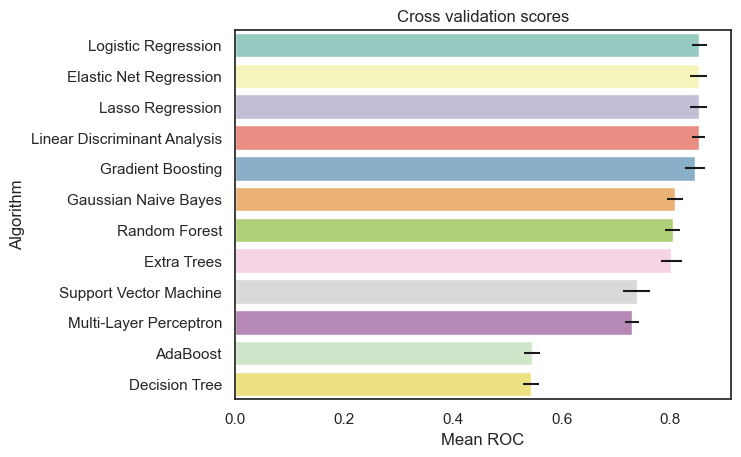

In [4]:
# Modeling step Test differents algorithms 
Y_all = allcause["allcause"]
X_all = allcause.loc[:, allcause.columns != "allcause"]
random_state = 1005
kfold = 10
classifiers = []

np.random.seed(random_state)

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
classifiers.append(GaussianNB())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state,max_iter=1000, learning_rate="adaptive"))
#classifiers.append(KNeighborsClassifier())
#classifiers.append(ElasticNet(alpha=0.5,random_state=random_state))
classifiers.append(ElasticNetCV(random_state=random_state,n_jobs=10))
#classifiers.append(Lasso(alpha=0.5, random_state=random_state)) 
classifiers.append(LassoCV(random_state=random_state,n_jobs=10))
classifiers.append(LogisticRegression(random_state = random_state,class_weight="balanced"))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_all, y =Y_all, scoring = "roc_auc", cv = kfold, n_jobs=10)) 

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Gaussian Naive Bayes","Support Vector Machine","Decision Tree","AdaBoost",
"Random Forest","Extra Trees","Gradient Boosting","Multi-Layer Perceptron", #"K Nearest Neighbors",
"Elastic Net Regression",
"Lasso Regression",
"Logistic Regression", 
"Linear Discriminant Analysis"
]})

cv_res = cv_res.sort_values(by='CrossValMeans', ascending=False)
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h", **{'xerr': cv_res["CrossValerrors"]}).set(xlabel="Mean ROC", title="Cross validation scores")


cv_res

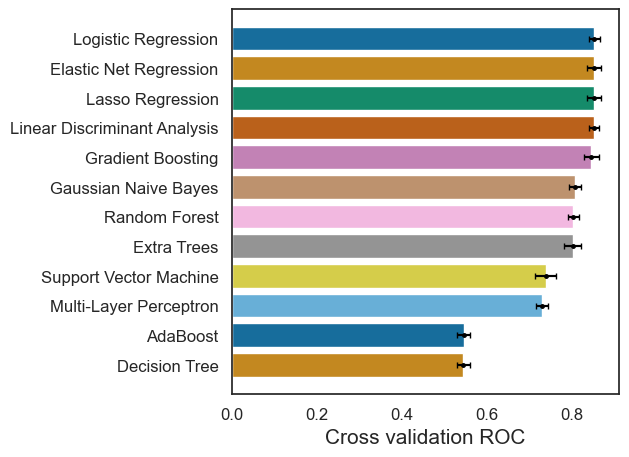

In [5]:
cv_res.to_excel('/mnt/data/lijincheng/UKB/Olink/0627/prediction/final_prediction1005/allcause_12algorithm_compare.xlsx', index=False)
# 设置图形的长和宽
plt.figure(figsize=(5, 5))

ax = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="colorblind", orient="h", **{'xerr': cv_res["CrossValerrors"]})
# 设置 X 轴和 Y 轴标签的字体大小
# 调整xlabel的字体大小
plt.rcParams['font.sans-serif'] = "Arial"
ax.set_xlabel('Cross validation ROC', fontsize=15)
ax.set_ylabel('', fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
#ax.set_title('ACD', fontsize=20)
# 新增调整 errorbar 的代码
for i, value in enumerate(cv_res["CrossValMeans"]):
    ax.errorbar(value, i, xerr=cv_res["CrossValerrors"].iloc[i], fmt='o', color='black', capsize=2, markersize=2.5)


plt.savefig('/mnt/data/lijincheng/UKB/Olink/0627/prediction/final_prediction1005/final_allcause_compare_12_algorithm.pdf',dpi=1200)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

# Load your dataset and preprocess it
# dataset = pd.read_csv("your_dataset.csv")
# Preprocess your dataset to get X (features) and y (target)

# Perform forward selection and record ROC AUC changes
def forward_selection(X, y, initial_list=[]):
    included = list(initial_list)
    roc_values = []
    models = []

    while True:
        excluded = list(set(X.columns) - set(included))
        roc_changes = []

        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_column]])).fit(disp=False)
            models.append(model)
            y_pred = model.predict(sm.add_constant(X[included + [new_column]]))
            roc_changes.append(roc_auc_score(y, y_pred))

        if not roc_changes:
            break

        best_feature_idx = np.argmax(roc_changes)
        best_feature = excluded[best_feature_idx]
        included.append(best_feature)
        roc_values.append(roc_changes[best_feature_idx])

        # Calculate standard errors for each ROC AUC value
        se = np.array([model.bse[-1] for model in models])

        # Calculate confidence intervals (assuming normal distribution)
        ci_lower = [roc_values[i] - 1.96 * se[i] for i in range(len(roc_values))]
        ci_upper = [roc_values[i] + 1.96 * se[i] for i in range(len(roc_values))]

    # Create a DataFrame to display selected_features, roc_values, ci_lower, and ci_upper
    roc_data = pd.DataFrame({
        "Feature": included[:len(roc_values)],
        "ROC_AUC": roc_values,
        "CI_Lower": ci_lower,
        "CI_Upper": ci_upper
    })

    return roc_data

# Perform forward selection
# Assuming X_all and Y_all are defined
roc_data_result = forward_selection(X_all, Y_all)
roc_data_result.head



<bound method NDFrame.head of       Feature   ROC_AUC  CI_Lower  CI_Upper
0        NEFL  0.765998  0.704979  0.827018
1        GFAP  0.792210  0.731805  0.852616
2        BCAN  0.824273  0.773306  0.875240
3       GDF15  0.831773  0.781699  0.881847
4      PTPRN2  0.838802  0.782945  0.894660
5        EGFR  0.843104  0.785100  0.901108
6       LTBP2  0.845785  0.785708  0.905862
7        BAG3  0.847512  0.799821  0.895204
8       NPTXR  0.849365  0.791377  0.907352
9       CD276  0.850581  0.797657  0.903504
10       CST5  0.851811  0.794646  0.908976
11    CEACAM5  0.852770  0.801619  0.903922
12       PSG1  0.853444  0.791568  0.915320
13       CDON  0.854156  0.790255  0.918057
14      EDA2R  0.854623  0.795743  0.913504
15        PVR  0.855087  0.793655  0.916518
16       SCLY  0.855470  0.803480  0.907460
17       MMP3  0.855897  0.791645  0.920150
18      HPGDS  0.856216  0.806160  0.906272
19     CHI3L1  0.856508  0.794914  0.918102
20      TIMP4  0.856797  0.796917  0.916676
21

In [7]:
roc_data_result.to_excel('/mnt/data/lijincheng/UKB/Olink/0627/prediction/final_prediction1005/allcause_forward_selection.xlsx', index=False)

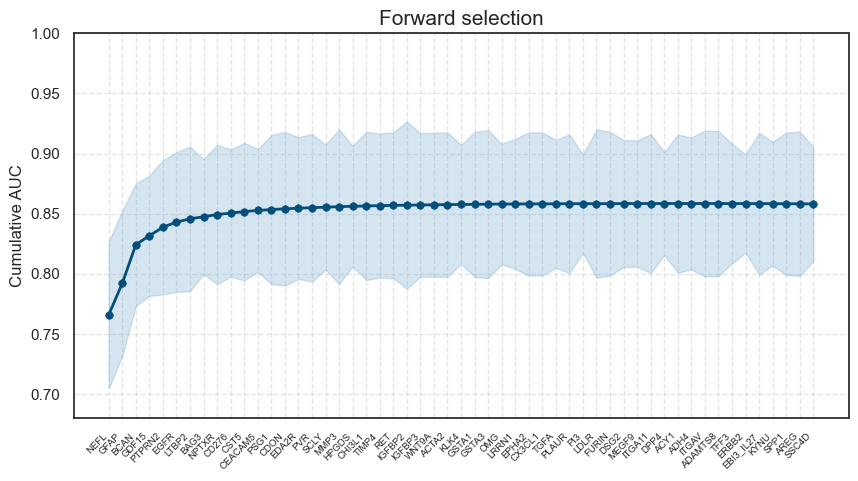

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制折线图
# 绘制折线图
plt.figure(figsize=(10, 5))
plot = sns.lineplot(x="Feature", y="ROC_AUC", data=roc_data_result, color='#034e7b', linewidth=2)

# 添加置信区间区域
plt.fill_between(x=roc_data_result["Feature"], y1=roc_data_result["CI_Lower"],
                 y2=roc_data_result["CI_Upper"], alpha=0.3, color='#74a9cf')

# 绘制曲线上的点
sns.scatterplot(x="Feature", y="ROC_AUC", data=roc_data_result, color='#034e7b',edgecolor='#034e7b', s=30)

# 将前十个变量的点和对应的 X 轴变量名改为红色
top_10_features = roc_data_result.nlargest(10, "ROC_AUC")["Feature"].tolist()
for line in plot.lines:
    if line.get_label() in top_10_features:
        line.set_linewidth(3)  # 增加线条宽度
for point in plot.collections:
    if point.get_label() in top_10_features:
        point.set_color('red')

# 设置网格线
plt.grid(True, linestyle='--', alpha=0.5)
# 设置图形属性
plt.title("Forward selection",fontsize=15)
plt.xlabel("")
plt.ylabel("Cumulative AUC")
plt.xticks(rotation=45, ha="right",fontsize=7)
# 设置 y 轴范围
plt.ylim(0.68, 1)
# 设置 y 轴刻度
plt.yticks([ 0.7,0.75, 0.8,0.85,0.9,0.95, 1.0])
plt.savefig('ACDselection.pdf',dpi=1200)
# 显示图形
plt.show()
# Save the figure to a file (e.g., 'roc_plot.png')